In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv("/content/cleaned_text.csv")

In [ ]:
df.head()

,Unnamed: 0,LABEL,Text
0,0,weather,none
1,1,weather,balloon crashed island taiwan say cause jump c...
2,2,weather,resident edge part north island prepare severe...
3,3,weather,weird weather week nationwide amid widespread ...
4,4,weather,california enduring winter wild weather human ...


In [ ]:
df.drop(labels = ['Unnamed: 0'], axis =1, inplace = True)

In [ ]:
df

,LABEL,Text
0,weather,none
1,weather,balloon crashed island taiwan say cause jump c...
2,weather,resident edge part north island prepare severe...
3,weather,weird weather week nationwide amid widespread ...
4,weather,california enduring winter wild weather human ...
...,...,...
395,movie,martin scorsese latest film join slew three ho...
396,movie,chemical compound called keanumycins kill necr...
397,movie,season netflix take ghoulish clan wait
398,movie,increasingly sexless multiplex option steven s...


In [ ]:
df['LABEL'].value_counts()

weather    100
water      100
fitness    100
movie      100
Name: LABEL, dtype: int64

In [ ]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
#Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        tokenizer = tokenizer.tokenize)

In [ ]:
df_text = df['Text']

In [ ]:
# Fit and Transfrom Text Data
df_cluster = tf_idf_vect.fit_transform(df_text)
a = pd.DataFrame(df_cluster.toarray(), columns=tf_idf_vect.get_feature_names_out())


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
a

,abandoned,ability,able,abrahamic,absolute,absurdist,abused,academy,accelerometer,accessing,...,yesterday,york,younger,youth,youtube,zammit,zealand,zimbabwe,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

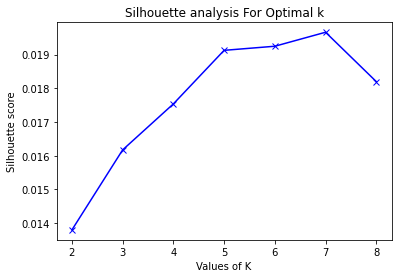

In [ ]:
## Silhouette Graph
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans_s = KMeans(n_clusters=num_clusters, random_state=2)
 kmeans_s.fit(a)
 cluster_labels = kmeans_s.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(a, cluster_labels))

#Plotting
plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

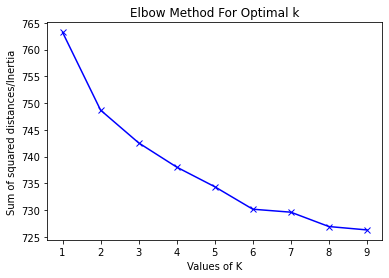

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans_e = KMeans(n_clusters=num_clusters, random_state= 2)
 kmeans_e.fit(a)
 Sum_of_squared_distances.append(kmeans_e.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [ ]:
#Clustering for n = 5
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(a)
clusters_5 = kmeans_5.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Reducing Dimensionality for n = 5
pca = PCA(n_components=2, random_state=2)
pca_vecs = pca.fit_transform(a.values.tolist())
a0 = pca_vecs[:, 0]
a1 = pca_vecs[:, 1]

In [ ]:
df['cluster_5'] = clusters_5
df['a0_5'] = a0
df['a1_5'] = a1

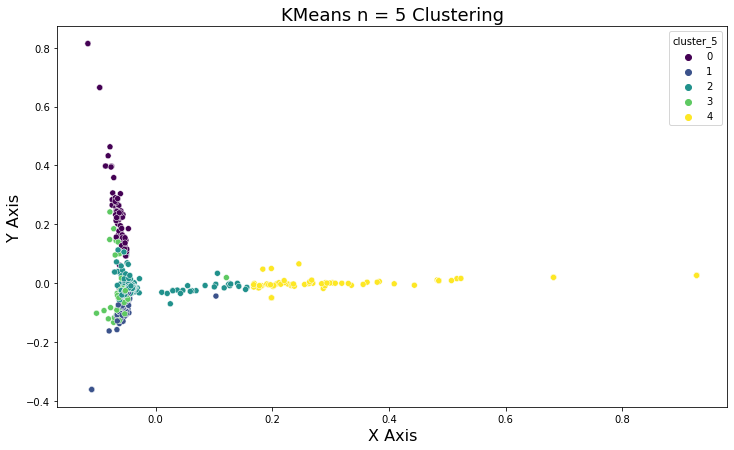

In [ ]:
#Plotting Clusters for n = 5
plt.figure(figsize=(12, 7))
plt.title("KMeans n = 5 Clustering", fontdict={"fontsize": 18})
plt.xlabel("X Axis", fontdict={"fontsize": 16})
plt.ylabel("Y Axis", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='a0_5', y='a1_5', hue='cluster_5', palette="viridis")
plt.show()

In [ ]:
#Clustering for n = 6
kmeans_6 = KMeans(n_clusters=6)
kmeans_6.fit(a)
clusters_6 = kmeans_6.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Reducing Dimensionality for n = 6
pca_6 = PCA(n_components=2, random_state=2)
pca_vecs_6 = pca_6.fit_transform(a.values.tolist())
a0_6 = pca_vecs_6[:, 0]
a1_6 = pca_vecs_6[:, 1]

In [ ]:
df['cluster_6'] = clusters_6
df['a0_6'] = a0_6
df['a1_6'] = a1_6

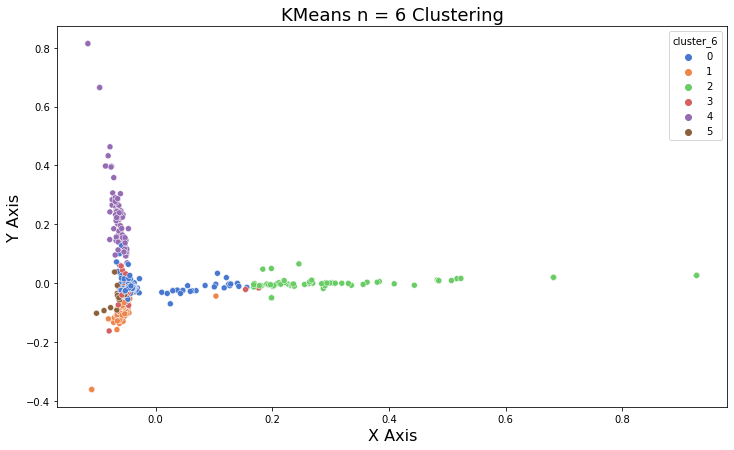

In [ ]:
#Plotting Clusters for n = 6
plt.figure(figsize=(12, 7))
plt.title("KMeans n = 6 Clustering", fontdict={"fontsize": 18})
plt.xlabel("X Axis", fontdict={"fontsize": 16})
plt.ylabel("Y Axis", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='a0_6', y='a1_6', hue='cluster_6', palette="muted")
plt.show()

In [ ]:
#Clustering for n = 7
kmeans_7 = KMeans(n_clusters=7)
kmeans_7.fit(a)
clusters_7 = kmeans_7.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Reducing Dimensionality for n = 7
pca_7 = PCA(n_components=2, random_state=2)
pca_vecs_7 = pca_7.fit_transform(a.values.tolist())
a0_7 = pca_vecs_7[:, 0]
a1_7 = pca_vecs_7[:, 1]

In [ ]:
df['cluster_7'] = clusters_7
df['a0_7'] = a0_7
df['a1_7'] = a1_7

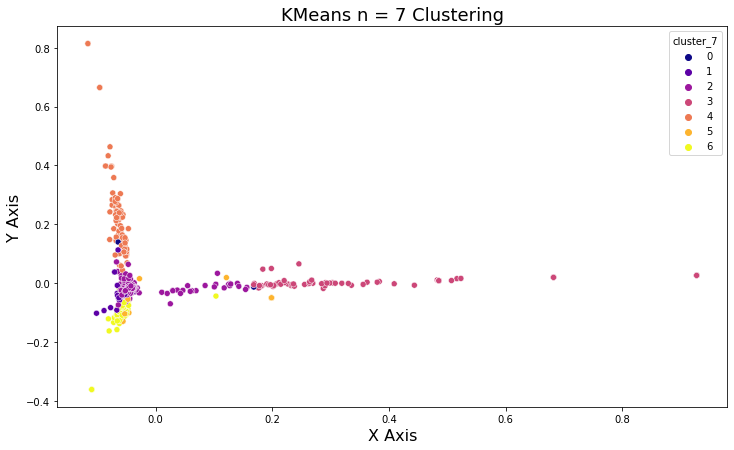

In [ ]:
#Plotting Clusters for n = 7
plt.figure(figsize=(12, 7))
plt.title("KMeans n = 7 Clustering", fontdict={"fontsize": 18})
plt.xlabel("X Axis", fontdict={"fontsize": 16})
plt.ylabel("Y Axis", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='a0_7', y='a1_7', hue='cluster_7', palette="plasma")
plt.show()

In [ ]:
#Clustering for n = 4
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(a)
clusters_4 = kmeans_4.labels_
centroids_4  = kmeans_4.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Reducing Dimensionality for n = 4
pca_4 = PCA(n_components=2, random_state=2)
pca_vecs_4 = pca_4.fit_transform(a.values.tolist())
a0_4 = pca_vecs_4[:, 0]
a1_4 = pca_vecs_4[:, 1]

In [ ]:
df['cluster_4'] = clusters_4
df['a0_4'] = a0_4
df['a1_4'] = a1_4

In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "AI", 1: "AI Ethics", 2: "AI Art",3:"Deep Fake"}
# apply mapping
df['map'] = df['cluster_4'].map(cluster_map)

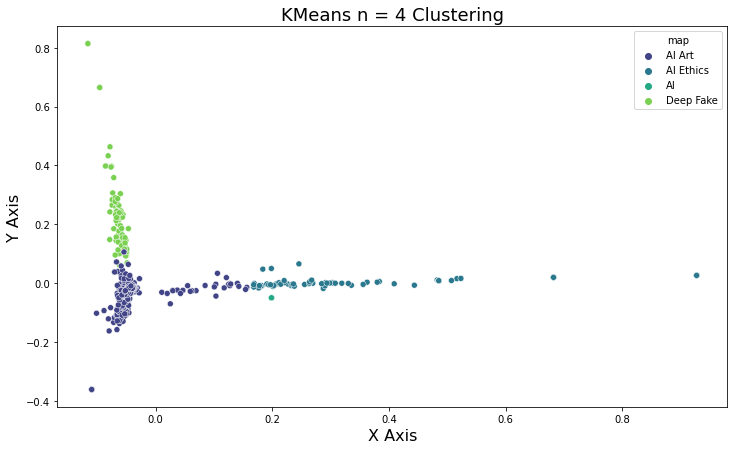

In [ ]:
#Plotting Clusters for n = 4
plt.figure(figsize=(12, 7))
plt.title("KMeans n = 4 Clustering", fontdict={"fontsize": 18})
plt.xlabel("X Axis", fontdict={"fontsize": 16})
plt.ylabel("Y Axis", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='a0_4', y='a1_4', hue='map', palette="viridis")
plt.show()

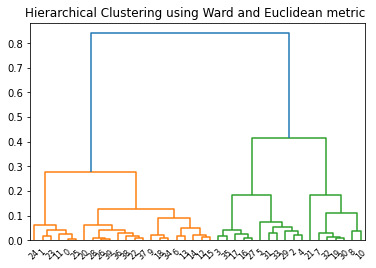

<Figure size 864x504 with 0 Axes>

In [ ]:
#Hierarchical Clustering with cosine sim
x = a0_4.tolist()
y = a1_4.tolist()
data = list(zip(x,y))
d = data[:40]
linkage_data = linkage(d, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title("Hierarchical Clustering using Ward and Euclidean metric ")
plt.figure(figsize=(12, 7))
plt.show()